In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Simple linear regression
## 1.1 Importing data

In [5]:
df = pd.read_csv('IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## 1.2 Getting a sample of 10 points

In [6]:
df_sample= df.sample (10, random_state=24)
df_sample.head(10)

,Temperature,Revenue
421,17.299204,405.915159
105,17.262181,415.817674
222,25.865943,596.984241
119,25.496624,596.236690
347,24.960446,564.310532
352,12.704718,295.339699
130,21.696783,496.011917
187,11.187757,293.926393
32,8.790953,237.763911
3,20.595335,487.706960


## 1.3 Plotting points

Text(0.5, 1.0, 'Ice cream revenue based on temperature (sample)')

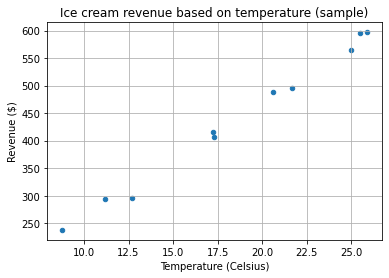

In [7]:
# plotting sample
ax1 = df_sample.plot.scatter(x='Temperature',y='Revenue')
plt.ylabel('{} ($)'.format(df.columns[1]))
plt.xlabel('{} (Celsius)'.format(df.columns[0]))
plt.grid() #adding gridlines to plot
plt.title ('Ice cream revenue based on temperature (sample)')

Text(0.5, 1.0, 'Ice cream revenue based on temperature')

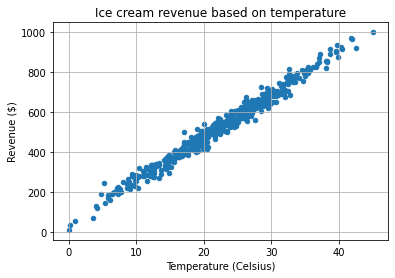

In [8]:
# Plotting all dataset
ax2 = df.plot.scatter(x='Temperature',y='Revenue')
plt.ylabel('{} ($)'.format(df.columns[1]))
plt.xlabel('{} (Celsius)'.format(df.columns[0]))
plt.grid() #adding gridlines to plot
plt.title ('Ice cream revenue based on temperature')

# 1.4 Modelling

In [9]:
x= df[['Temperature']] #independent variable
y= df['Revenue']       #dependent variable
# istanciating the model
model = LinearRegression()
# fitting the model
model.fit(x, y)


LinearRegression()

In [144]:
# Get model results
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 44.831267090563585
slope: [21.44362551]


Text(0.5, 1.0, 'Ice Cream Revenue')

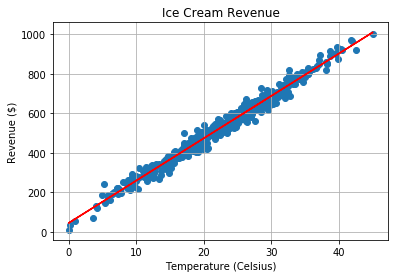

In [145]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color = 'red')
plt.ylabel('{} ($)'.format(df.columns[1]))
plt.xlabel('{} (Celsius)'.format(df.columns[0]))
plt.grid()
plt.title('Ice Cream Revenue')

(0, 700)

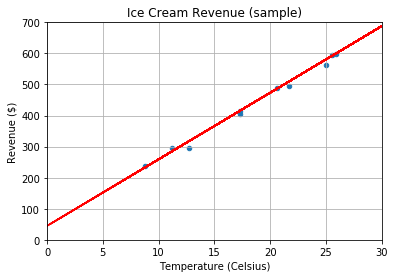

In [146]:
df_sample.plot.scatter(x='Temperature',y='Revenue')
plt.plot(x, model.predict(x), color = 'red')
plt.ylabel('{} ($)'.format(df.columns[1]))
plt.xlabel('{} (Celsius)'.format(df.columns[0]))
plt.title('Ice Cream Revenue (sample)')
plt.grid()
plt.xlim(0,30)
plt.ylim(0,700)

## 1.5 Calculating residuals

In [147]:
df_sample['predicted_revenue (y_hat)']= model.predict(df_sample[['Temperature']])
df_sample['residuals (y- y_hat)']= df_sample['Revenue']- df_sample['predicted_revenue (y_hat)']
df_sample.head(10)

,Temperature,Revenue,predicted_revenue (y_hat),residuals (y- y_hat)
421,17.299204,405.915159,415.788916,-9.873757
105,17.262181,415.817674,414.995015,0.822660
222,25.865943,596.984241,599.490869,-2.506628
119,25.496624,596.236690,591.571326,4.665364
347,24.960446,564.310532,580.073716,-15.763185
352,12.704718,295.339699,317.266477,-21.926778
130,21.696783,496.011917,510.088950,-14.077033
187,11.187757,293.926393,284.737335,9.189058
32,8.790953,237.763911,233.341167,4.422744
3,20.595335,487.706960,486.469919,1.237041


# 1.6 Statistical modeling

In [148]:
import statsmodels.api as sm

x = sm.add_constant(x)
# instanciating the model
model = sm.OLS(y, x)
#fitting the model
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.404e+04
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:17:42   Log-Likelihood:                -2318.1
No. Observations:                 500   AIC:                             4640.
Df Residuals:                     498   BIC:                             4649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8313      3.272     13.703      

/Users/mariemloukil/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# 1.7 Which variable to choose ? 

In [149]:
# importing data 
df1 = pd.read_csv('advertising.csv')
df1.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [150]:
import seaborn as sns
%matplotlib inline 

Text(0.5, 1.0, 'Newspaper')

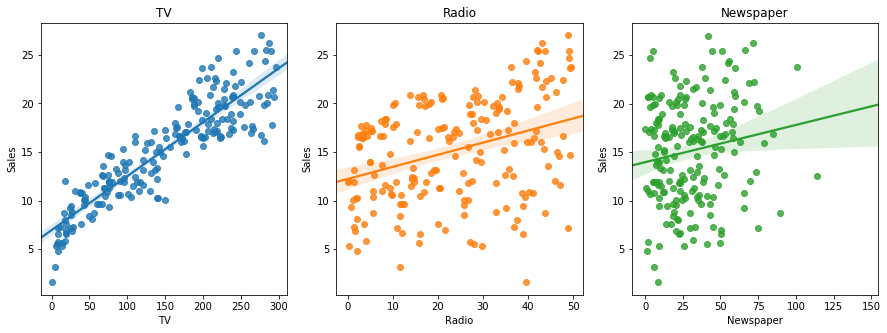

In [151]:
# Visualizing Data

f, axes = plt.subplots(1, 3,  figsize=(15, 5))
# plotting regression for TV
sns.regplot(ax=axes[0],x='TV', y='Sales', data=df1)
axes[0].set_title('TV')

# plotting regression for Radio
sns.regplot(ax=axes[1],x='Radio', y='Sales', data=df1)
axes[1].set_title('Radio')

# plotting regression for Radio
sns.regplot(ax=axes[2],x='Newspaper', y='Sales', data=df1)
axes[2].set_title('Newspaper')

In [152]:
# Modeling each variable: 
y=df1 ['Sales']
x1= df1 [['TV']]
x2= df1 [['Radio']]
x3= df1 [['Newspaper']]


In [153]:
# TV 
x1 = sm.add_constant(x1)
# instanciating the model
model_TV = sm.OLS(y, x1)
#fitting the model
results_tv= model_TV.fit()
print(results_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           7.93e-74
Time:                        11:17:43   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [154]:
# Radio 
x2 = sm.add_constant(x2)
# instanciating the model
model = sm.OLS(y, x2)
#fitting the model
results_Radio= model.fit()
print(results_Radio.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           3.88e-07
Time:                        11:17:43   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.0

In [155]:
# Newspaper
x3 = sm.add_constant(x3)
# instanciating the model
model = sm.OLS(y, x3)
#fitting the model
results_Newspaper= model.fit()
print(results_Newspaper.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Mon, 12 Apr 2021   Prob (F-statistic):             0.0255
Time:                        11:17:43   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9595      0.638     21.870      0.0

# 2. Multivariate regression 

## 2.1 Continuing on previous example

In [156]:
new_x =df1 [['TV','Radio', 'Newspaper']]
new_x = sm.add_constant(new_x)
# instanciating the model
model_allvariables = sm.OLS(y, new_x)
#fitting the model
results_all_variables= model_allvariables.fit()
print(results_all_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           8.13e-99
Time:                        11:17:43   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## 2.2 Calculate MSE

In [10]:
from sklearn.metrics import mean_squared_error

#MSE For TV Model  (simple regression model)

mse_TV = mean_squared_error(y, results_tv.predict(x1))
print('The mean square error of simple regression model value is: ',mse_TV)

#MSE For TV, Radio and newspaper Model  (multivariate regression model)
mse_all = mean_squared_error(y, results_all_variables.predict(new_x))
print('The mean square error of multivariate regression model value is: ',mse_all)

NameError: name 'results_tv' is not defined

# 2.3 Work absenteism

In [192]:
df2 = pd.read_csv('MFGEmployees4.csv')
work= df2[['Gender','BusinessUnit', 'Age', 'LengthService','AbsentHours']]
work.head(10)

,Gender,BusinessUnit,Age,LengthService,AbsentHours
0,F,Stores,32.028816,6.018478,36.577306
1,M,Stores,40.320902,5.532445,30.165072
2,M,Stores,48.822047,4.389973,83.807798
3,F,Stores,44.599357,3.081736,70.020165
4,M,Stores,35.697876,3.619091,0.000000
5,M,Stores,48.440311,2.717692,81.830079
6,M,HeadOffice,50.752730,10.157918,60.495072
7,M,Stores,36.216031,4.432123,30.072902
8,M,Stores,58.427380,6.940121,181.630819
9,M,HeadOffice,39.853980,13.848321,30.664408


In [193]:
from statsmodels.formula.api import ols
# modeling 
work_results = ols('AbsentHours ~ C(Gender) + C(BusinessUnit) + Age+ LengthService', data=work).fit() 

work_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AbsentHours   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     5572.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:30:51   Log-Likelihood:                -38851.
No. Observations:                8336   AIC:                         7.771e+04
Df Residuals:                    8331   BIC:                         7.775e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -122.6162      3.108    -39.446      0.000    -128.710    -116.523
C(Gender)[T.M]              -16.5474      0.562    -29.449      0.000     -17.649     -15.446
C(BusinessUnit)[T.Stores]    21.7897      2.429      8.972      0.000      17.029      26.551
Age                           4.1867      0.028    147.822      0.000       4.131       4.242
LengthService                -1.0330      0.141     -7.351      0.000      -1.309      -0.758
==============================================================================
Omnibus:                       73.435   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.308
Skew:                           0.104   Prob(JB):                     2.24e-23
Kurtosis:                       3.507   Cond. No.                         598.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""